In [17]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
spark=SparkSession.builder.appName('Assignment').getOrCreate()

In [21]:
# To read csv file / Create dataFrame using dataset1.csv

data = spark.read.csv('dataset1.csv',header=True,inferSchema=True)


In [23]:
data.printSchema();

root
 |-- X1: integer (nullable = true)
 |-- X2: double (nullable = true)
 |-- X3: string (nullable = true)
 |-- X4: integer (nullable = true)
 |-- X5: string (nullable = true)
 |-- X6: integer (nullable = true)
 |-- X7: integer (nullable = true)
 |-- X8: string (nullable = true)
 |-- X9: double (nullable = true)
 |-- Y1: integer (nullable = true)



In [25]:
data.show()

+---+------+----+---+---+---+---+---+----+---+
| X1|    X2|  X3| X4| X5| X6| X7| X8|  X9| Y1|
+---+------+----+---+---+---+---+---+----+---+
| 59|28.378|0.34|204|196|132| 49| 92| 7.7|  1|
| 59|24.968|   1|147|181|129| 34| 96|4.09|  1|
| 48|31.307|0.62|155|185|127| 41|139| 4.5|  1|
| 47|27.837|0.38|488|254|158| 55|250| 5.3|  2|
| 55|22.662|0.49| 87|175|120| 44| 99| 6.9|  1|
| 68|23.985| 1.2| 96|193|135| 48|125| 7.9|  2|
| 58|22.096|0.09| 70|200|133| 60|154| 7.0|  2|
| 48|28.577|0.12|139|151| 95| 37|102| 5.6|  1|
| 63|25.034|    |243|195|129| 45| 91| 6.9|  1|
| 53|27.253| 1.3| 93|151| 91| 55|100|9.19|  2|
| 57|30.538| 5.1|194|250|178| 51| 93|13.5|  2|
| 65|24.309| 1.6| 74|173|121| 43|114| 6.4|  2|
| 68|22.888|0.77| 87|196|129| 55|144| 9.8|  2|
| 68|  28.3|0.97|152|180|125| 37| 88| 4.3|  2|
| 64|25.852| 2.3| 93|187|136| 40| 99|8.69|  2|
| 67|20.716| 0.5|112|219|137| 69| 98| 8.5|  1|
| 61|24.204| 1.5|140|208|149| 38|136|11.5|  1|
| 51|25.829| 2.6| 79|248|185| 44|105| 7.8|  1|
| 33|24.843| 

In [27]:
data.count()

6967

In [29]:
data= data.na.replace([" "], [None])

In [31]:
data.show()


+---+------+----+---+---+---+---+---+----+---+
| X1|    X2|  X3| X4| X5| X6| X7| X8|  X9| Y1|
+---+------+----+---+---+---+---+---+----+---+
| 59|28.378|0.34|204|196|132| 49| 92| 7.7|  1|
| 59|24.968|   1|147|181|129| 34| 96|4.09|  1|
| 48|31.307|0.62|155|185|127| 41|139| 4.5|  1|
| 47|27.837|0.38|488|254|158| 55|250| 5.3|  2|
| 55|22.662|0.49| 87|175|120| 44| 99| 6.9|  1|
| 68|23.985| 1.2| 96|193|135| 48|125| 7.9|  2|
| 58|22.096|0.09| 70|200|133| 60|154| 7.0|  2|
| 48|28.577|0.12|139|151| 95| 37|102| 5.6|  1|
| 63|25.034|null|243|195|129| 45| 91| 6.9|  1|
| 53|27.253| 1.3| 93|151| 91| 55|100|9.19|  2|
| 57|30.538| 5.1|194|250|178| 51| 93|13.5|  2|
| 65|24.309| 1.6| 74|173|121| 43|114| 6.4|  2|
| 68|22.888|0.77| 87|196|129| 55|144| 9.8|  2|
| 68|  28.3|0.97|152|180|125| 37| 88| 4.3|  2|
| 64|25.852| 2.3| 93|187|136| 40| 99|8.69|  2|
| 67|20.716| 0.5|112|219|137| 69| 98| 8.5|  1|
| 61|24.204| 1.5|140|208|149| 38|136|11.5|  1|
| 51|25.829| 2.6| 79|248|185| 44|105| 7.8|  1|
| 33|24.843| 

In [33]:
total_row=data.na.drop()

In [35]:
total_row_before_removed = data.count()
removed_row_count= total_row.count()
total_rows_removed =total_row_before_removed - removed_row_count
print(f"Number of rows removed:{total_rows_removed}")

Number of rows removed:58


In [37]:
summary_stats = total_row.describe("X1")

In [39]:
summary_stats.show()

+-------+------------------+
|summary|                X1|
+-------+------------------+
|  count|              6909|
|   mean|53.340715009408015|
| stddev| 8.712714893790364|
|    min|                21|
|    max|                90|
+-------+------------------+



In [97]:
#Calculate the variance 
variance = total_row.select(F.variance('X1')).collect()[0][0]
median = total_row.select(F.expr("percentile_approx(X1,0.5)")).collect()[0][0]
print(f'variance:',variance)
print(f'median:',median)

#Select the X1 and convert it to a list
data_X1 = total_row.select("X1").rdd.flatMap(lambda x:x).collect()

variance: 75.91140082047643
median: 53


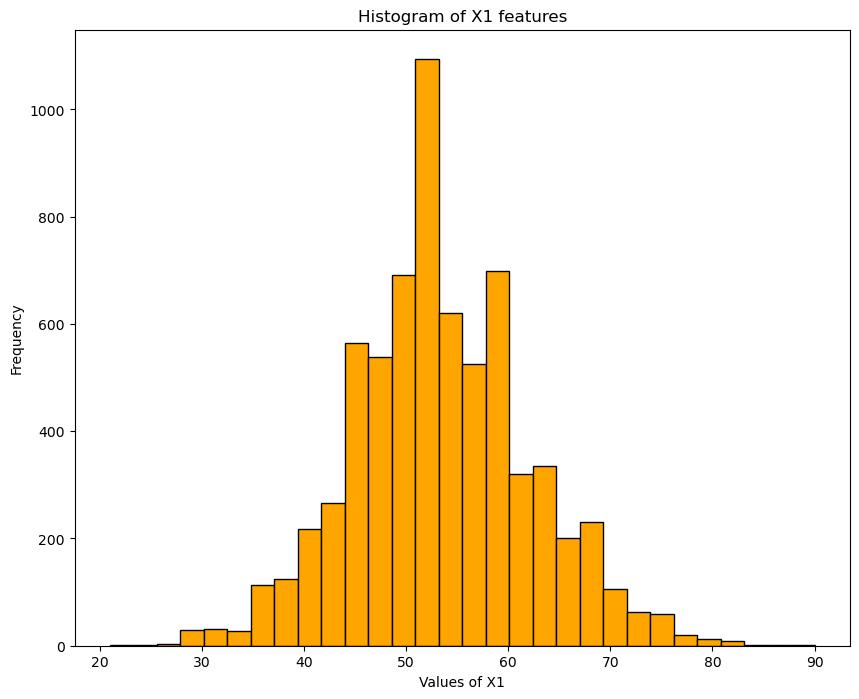

In [43]:
# Create the histogram for X1 data 
plt.figure(figsize =(10,8))
plt.hist(data_X1,bins = 30, color='orange',edgecolor='black')
plt.title('Histogram of X1 features')
plt.xlabel('Values of X1')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [45]:
# Calculate the quartiles 
quartiles = total_row.approxQuantile("X2",[0.25,0.5,0.75],0.0)
q1,median,q3 = quartiles

In [47]:
# Print the quartiles values

print(f'First Quartile(Q1):{q1}')
print(f'Median or Second Quartile (Q2) : {median}')
print(f'Third Quartile (Q3):{q3}')

First Quartile(Q1):22.975
Median or Second Quartile (Q2) : 24.704
Third Quartile (Q3):26.435


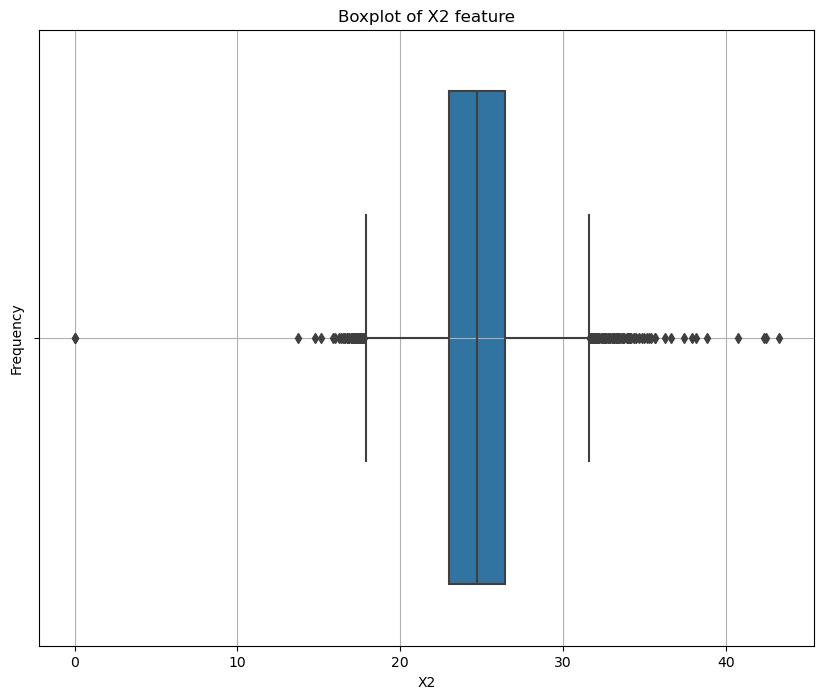

In [49]:
# Generate boxplot
data_X2 = total_row.select('X2').rdd.flatMap(lambda row:row).collect()
plt.figure(figsize=(10,8))
sns.boxplot(x=data_X2)
plt.title('Boxplot of X2 feature')
plt.xlabel('X2')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [51]:
# Use a filter and count methods
count = total_row.filter((total_row['X1'] > 50 )& (total_row['Y1'] == 1 )).count()

In [53]:
# Display the count
print('Number of rows where X1 id greater than 50 and Y1 is equals to 1 :',count)

Number of rows where X1 id greater than 50 and Y1 is equals to 1 : 2166


In [56]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.sql.functions import col

In [58]:
# Convert string columns to numerical columns using StringIndexer
indexers = [StringIndexer(inputCol=c, outputCol=f'{c}_index').fit(total_row) for c in ['X3', 'X5', 'X8']]
indexed_df = total_row
for indexer in indexers:
    indexed_df = indexer.transform(indexed_df)

In [60]:
# Select the indexed columns and the label column
indexed_cols = ['Y1'] + [indexer.getOutputCol() for indexer in indexers]
indexed_df = indexed_df.select(indexed_cols)

In [62]:
# Create a vector assembler to combine all other columns as predictors
assembler = VectorAssembler(inputCols=[x for x in indexed_cols if x != 'Y1'], outputCol='features')

In [64]:
# Apply the vector assembler to the DataFrame
assembled_df = assembler.transform(indexed_df)

# Split the data into training and test sets
train, test = assembled_df.randomSplit([0.7, 0.3])

In [66]:
# Create a logistic regression model
lr = LogisticRegression(featuresCol='features', labelCol='Y1')

In [68]:
# Create a random forest classifier model
rf = RandomForestClassifier(featuresCol='features', labelCol='Y1',maxBins=300)

In [70]:
# Fit the models to the training data
lrModel = lr.fit(train)
rfModel = rf.fit(train)

24/05/17 18:21:03 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


In [71]:
# Make predictions on the test data
lrPredictions = lrModel.transform(test)
rfPredictions = rfModel.transform(test)

In [72]:
# Create the evaluator for AUC
evaluator = BinaryClassificationEvaluator(labelCol="Y1", rawPredictionCol="prediction")

# Evaluate logistic regression model AUC
lrAUC = evaluator.evaluate(lrPredictions)

In [73]:
# Evaluate random forest model AUC
rfAUC = evaluator.evaluate(rfPredictions)

In [74]:
# Calculate true positives, false positives, and precision for logistic regression
tp_lr = lrPredictions.filter((col('Y1') == 1) & (col('prediction') == 1)).count()
fp_lr = lrPredictions.filter((col('Y1') == 0) & (col('prediction') == 1)).count()
lrPrecision = tp_lr / (tp_lr + fp_lr)


In [75]:
# Calculate true positives, false positives, and precision for random forest
tp_rf = rfPredictions.filter((col('Y1') == 1) & (col('prediction') == 1)).count()
fp_rf = rfPredictions.filter((col('Y1') == 0) & (col('prediction') == 1)).count()
rfPrecision = tp_rf / (tp_rf + fp_rf)

In [76]:
# Print the evaluation metrics
print(f'Logistic Regression AUC: {lrAUC}')
print(f'Random Forest AUC: {rfAUC}')
print(f'Logistic Regression Precision: {lrPrecision}')
print(f'Random Forest Precision: {rfPrecision}')

Logistic Regression AUC: 1.0
Random Forest AUC: 1.0
Logistic Regression Precision: 1.0
Random Forest Precision: 1.0
